## Question 1: Comprehensive Data Acquisition and Preprocessing 
**Task:** 
Download and preprocess CO2 emissions data along with a wide range of socio-economic 
and environmental indicators from the World Bank’s Climate Change database. 
 
**Instructions:** 
1. Access the World Bank database using Python, R, or MATLAB. 
2. Download CO2 emissions data and as many relevant socio-economic and environmental 
indicators as possible (e.g., GDP, population, energy consumption, urbanization rate, 
education level, etc.). 
3. Clean and preprocess the data, addressing missing values, outliers, and ensuring 
consistency across indicators. 
4. Provide a detailed summary of the dataset, including key statistics, correlations between 
variables, and any notable patterns or anomalies

**How to use**
- Please refer to the deliverables folder and the [q1.md](deliverables/q1.md) file for an overview of the results of this first question.

In [1]:
import wbdata
import pandas as pd
from datetime import datetime
from helpers_v2 import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Key '6245383814330621964' not in persistent cache.
Key '-5150858560692259652' not in persistent cache.
Key '9151765542582249799' not in persistent cache.
Key '-2235510232523592016' not in persistent cache.
Key '4973850537978062079' not in persistent cache.
Key '-3187536638661833093' not in persistent cache.
Key '-2933299226112507130' not in persistent cache.
Key '6245383814330621964' not in persistent cache.
Key '-5150858560692259652' not in persistent cache.
Key '9151765542582249799' not in persistent cache.
Key '-2235510232523592016' not in persistent cache.
Key '4973850537978062079' not in persistent cache.
Key '-3187536638661833093' not in persistent cache.
Key '-2933299226112507130' not in persistent cache.
Key '6245383814330621964' not in persistent cache.
Key '-5150858560692259652' not in persistent cache.
Key '9151765542582249799' not in persistent cache.
Key '-2235510232523592016' not in persistent cache.
Key '4973850537978062079' not in persistent cache.
Key '-318753663866183

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
manipulate_data = DataManipulation()

In [4]:
# Uncomment this if you want to download the data from the API.
indicators = {
    'EN.ATM.CO2E.KT': 'CO2_emissions',        # CO2 emissions (kt)
    'NY.GDP.MKTP.CD': 'GDP',                  # GDP (current US$)
    'SP.POP.TOTL': 'Population',              # Population, total
    'EG.USE.PCAP.KG.OE': 'Energy_use',        # Energy use (kg of oil equivalent per capita)
    'SP.URB.TOTL.IN.ZS': 'Urbanization_rate', # Urban population (% of total population)
    'EG.ELC.RNEW.ZS' : 'Renewable_elec_output' # Renewable electricity output (% of total electricity output)
}

date_range = ('1990', '2020') # Dates where CO2 data is avaliable

df = manipulate_data.get_wb_data(indicators, date_range)

df.to_csv('raw_data/wbdata_raw.csv', index=False)

# Note: we didn't include any education-related factor since they have a lot of missing data

In [5]:
df.head()

,country,date,CO2_emissions,GDP,Population,Energy_use,Urbanization_rate,Renewable_elec_output
0,Africa Eastern and Southern,2020,544952.5030,9.290741e+11,685112979.0,NaN,36.828302,NaN
1,Africa Eastern and Southern,2019,610723.5000,1.006527e+12,667242986.0,NaN,36.336259,NaN
2,Africa Eastern and Southern,2018,598720.9575,1.012719e+12,649757148.0,NaN,35.847598,NaN
3,Africa Eastern and Southern,2017,590905.4820,9.401055e+11,632746570.0,NaN,35.358901,NaN
4,Africa Eastern and Southern,2016,580219.2420,8.298300e+11,616377605.0,NaN,34.894753,NaN


In [6]:
df.info()

<class 'wbdata.client.DataFrame'>
RangeIndex: 8246 entries, 0 to 8245
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                8246 non-null   object 
 1   date                   8246 non-null   object 
 2   CO2_emissions          7408 non-null   float64
 3   GDP                    7839 non-null   float64
 4   Population             8215 non-null   float64
 5   Energy_use             4740 non-null   float64
 6   Urbanization_rate      8153 non-null   float64
 7   Renewable_elec_output  6894 non-null   float64
dtypes: float64(6), object(2)
memory usage: 515.5+ KB


In [7]:
# Eliminate non country data
df = manipulate_data.eliminate_non_country_data(df) 
print(f'# of countries in the dataset: {len(df.country.unique())}')


# of countries in the dataset: 38


In [8]:
manipulate_data.missing_data_percentage(df)

country                   0.000000
date                      0.000000
CO2_emissions             0.000000
GDP                       1.103565
Population                0.000000
Energy_use               16.468591
Urbanization_rate         0.000000
Renewable_elec_output    16.129032
dtype: float64


In [9]:
# Checking the number of years in the current df
print(f'# of years in the dataset: {len(df.date.unique())}')

# of years in the dataset: 31


In [10]:
# Count missing values per country
missing_values_by_country = manipulate_data.get_missing_value_groupby(df, groupby_column='country', sort_by='Energy_use')
missing_values_by_country.head()


,country,CO2_emissions,GDP,Energy_use,Renewable_elec_output
21,Latvia,0,5,6,5
22,Lithuania,0,5,6,5
5,Colombia,0,0,6,5
6,Costa Rica,0,0,6,5
29,Portugal,0,0,5,5


In [11]:
countries_to_remove = manipulate_data.get_items_to_remove(df, missing_values_by_country, target_col_name='date', groupby_col = 'country')
list(countries_to_remove)

[]

In [12]:
df = df[~df.country.isin(countries_to_remove)].reset_index(drop=True)
df.info()

<class 'wbdata.client.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                1178 non-null   object 
 1   date                   1178 non-null   object 
 2   CO2_emissions          1178 non-null   float64
 3   GDP                    1165 non-null   float64
 4   Population             1178 non-null   float64
 5   Energy_use             984 non-null    float64
 6   Urbanization_rate      1178 non-null   float64
 7   Renewable_elec_output  988 non-null    float64
dtypes: float64(6), object(2)
memory usage: 73.8+ KB


In [13]:
# Print current number of countries
print(f'# of countries in the dataset: {len(df.country.unique())}')

# of countries in the dataset: 38


In [14]:
# Count missing values per year
missing_values_by_year = manipulate_data.get_missing_value_groupby(df, groupby_column='date', sort_by='Energy_use')
missing_values_by_year.head()

,date,CO2_emissions,GDP,Energy_use,Renewable_elec_output
30,2020,0,0,38,38
29,2019,0,0,38,38
28,2018,0,0,38,38
27,2017,0,0,38,38
26,2016,0,0,38,38


In [15]:
years_to_remove = manipulate_data.get_items_to_remove(df, missing_values_by_year, target_col_name='country', groupby_col='date')
years_to_remove.sort_values()

26    2016
27    2017
28    2018
29    2019
30    2020
Name: date, dtype: object

In [16]:
df = df[~df.date.isin(years_to_remove)].reset_index(drop=True)
df.info()

<class 'wbdata.client.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                988 non-null    object 
 1   date                   988 non-null    object 
 2   CO2_emissions          988 non-null    float64
 3   GDP                    975 non-null    float64
 4   Population             988 non-null    float64
 5   Energy_use             984 non-null    float64
 6   Urbanization_rate      988 non-null    float64
 7   Renewable_elec_output  988 non-null    float64
dtypes: float64(6), object(2)
memory usage: 61.9+ KB


In [17]:
df.date.unique()

array(['2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000',
       '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992',
       '1991', '1990'], dtype=object)

In [18]:
manipulate_data.missing_data_percentage(df)

country                  0.000000
date                     0.000000
CO2_emissions            0.000000
GDP                      1.315789
Population               0.000000
Energy_use               0.404858
Urbanization_rate        0.000000
Renewable_elec_output    0.000000
dtype: float64


### Data Imputation

In [19]:
df_missing_vals_only = manipulate_data.countries_with_missing_values(df)
df_missing_vals_only


,country,date,CO2_emissions,GDP,Population,Energy_use,Urbanization_rate,Renewable_elec_output
130,Colombia,2015,81017.20,2.934924e+11,47119728.0,NaN,79.764,68.236811
156,Costa Rica,2015,7537.90,5.644192e+10,4895242.0,NaN,76.862,99.001110
257,Estonia,1992,23010.60,NaN,1533091.0,4283.158664,70.860,0.008452
258,Estonia,1991,31869.20,NaN,1561314.0,5841.390649,71.046,0.000000
259,Estonia,1990,34544.90,NaN,1569174.0,6232.731998,71.231,0.000000
546,Latvia,2015,7315.90,2.726309e+10,1977527.0,NaN,67.980,50.171697
567,Latvia,1994,10223.50,NaN,2520742.0,1893.963365,68.901,74.436937
568,Latvia,1993,11757.31,NaN,2563290.0,2058.649626,68.799,73.292559
569,Latvia,1992,13974.80,NaN,2614338.0,2335.409193,68.852,65.753782
570,Latvia,1991,17201.50,NaN,2650581.0,2791.674731,69.201,58.026223


In [20]:
countries_with_miss_vals = df_missing_vals_only.country.unique()
countries_with_miss_vals

array(['Colombia', 'Costa Rica', 'Estonia', 'Latvia', 'Lithuania'],
      dtype=object)

In [21]:
df_no_null = manipulate_data.impute_data(df, countries_with_miss_vals)
df_no_null.info()

<class 'wbdata.client.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                988 non-null    object 
 1   date                   988 non-null    object 
 2   CO2_emissions          988 non-null    float64
 3   GDP                    988 non-null    float64
 4   Population             988 non-null    float64
 5   Energy_use             988 non-null    float64
 6   Urbanization_rate      988 non-null    float64
 7   Renewable_elec_output  988 non-null    float64
dtypes: float64(6), object(2)
memory usage: 61.9+ KB


### Address outliers

In [22]:
df_no_null.describe()

,CO2_emissions,GDP,Population,Energy_use,Urbanization_rate,Renewable_elec_output
count,9.880000e+02,9.880000e+02,9.880000e+02,988.000000,988.000000,988.000000
mean,3.264011e+05,8.975439e+11,3.215590e+07,3951.407868,74.925034,30.448862
std,8.633644e+05,2.102138e+12,5.194412e+07,2354.847740,11.090293,30.216464
min,1.859900e+03,4.013092e+09,2.548260e+05,531.126860,47.915000,0.000000
25%,3.677885e+04,6.724270e+10,4.696449e+06,2510.739426,67.708500,6.459901
50%,6.389675e+04,2.382385e+11,1.029660e+07,3564.759862,75.939500,17.478075
75%,3.379754e+05,6.883447e+11,4.422445e+07,4846.119644,83.465000,54.587631
max,5.775807e+06,1.829502e+13,3.207390e+08,18178.139015,97.876000,99.988380


In [23]:
df_no_null.to_csv('clean_data/wbdata_no_log_transformation.csv', index=False)

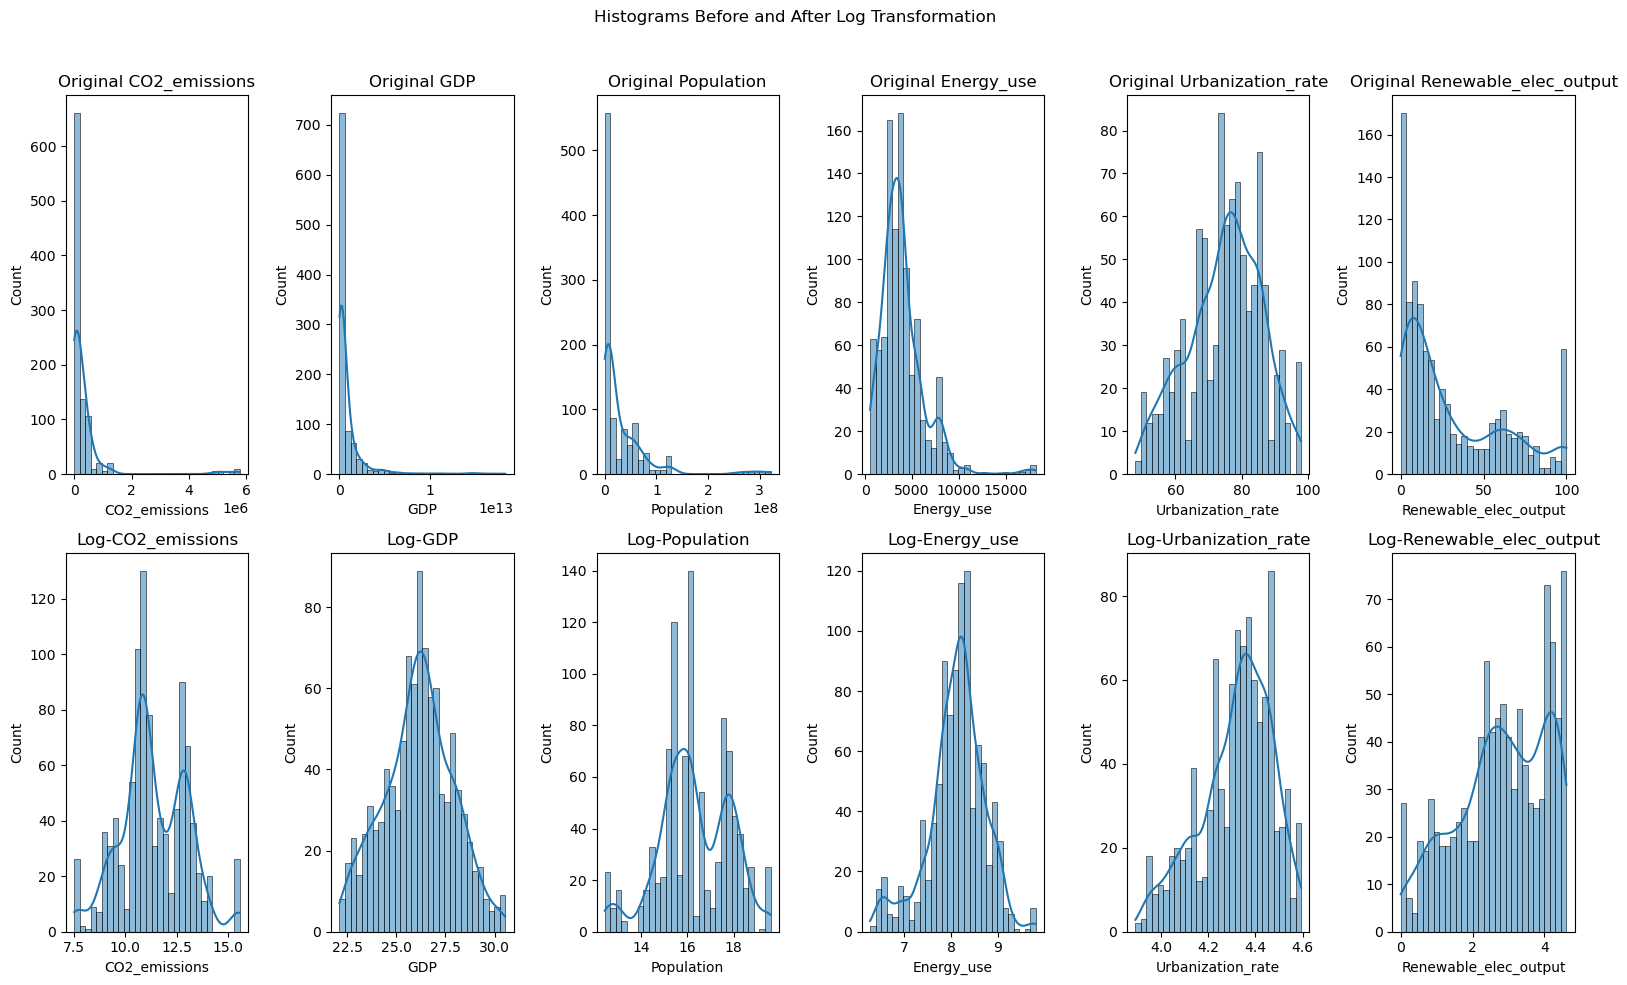

In [24]:
# List of columns to transform
columns_to_transform = ['CO2_emissions', 'GDP', 'Population', 'Energy_use', 'Urbanization_rate', 'Renewable_elec_output']

# Create a figure with subplots
fig, axes = plt.subplots(2, len(columns_to_transform), figsize=(16, 10))
fig.suptitle('Histograms Before and After Log Transformation')

for i, col in enumerate(columns_to_transform):
    # Original data
    sns.histplot(df_no_null[col], bins=30, kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'Original {col}')
    
    # Log-transformed data
    sns.histplot(np.log(df_no_null[col] + 1), bins=30, kde=True, ax=axes[1, i])
    axes[1, i].set_title(f'Log-{col}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


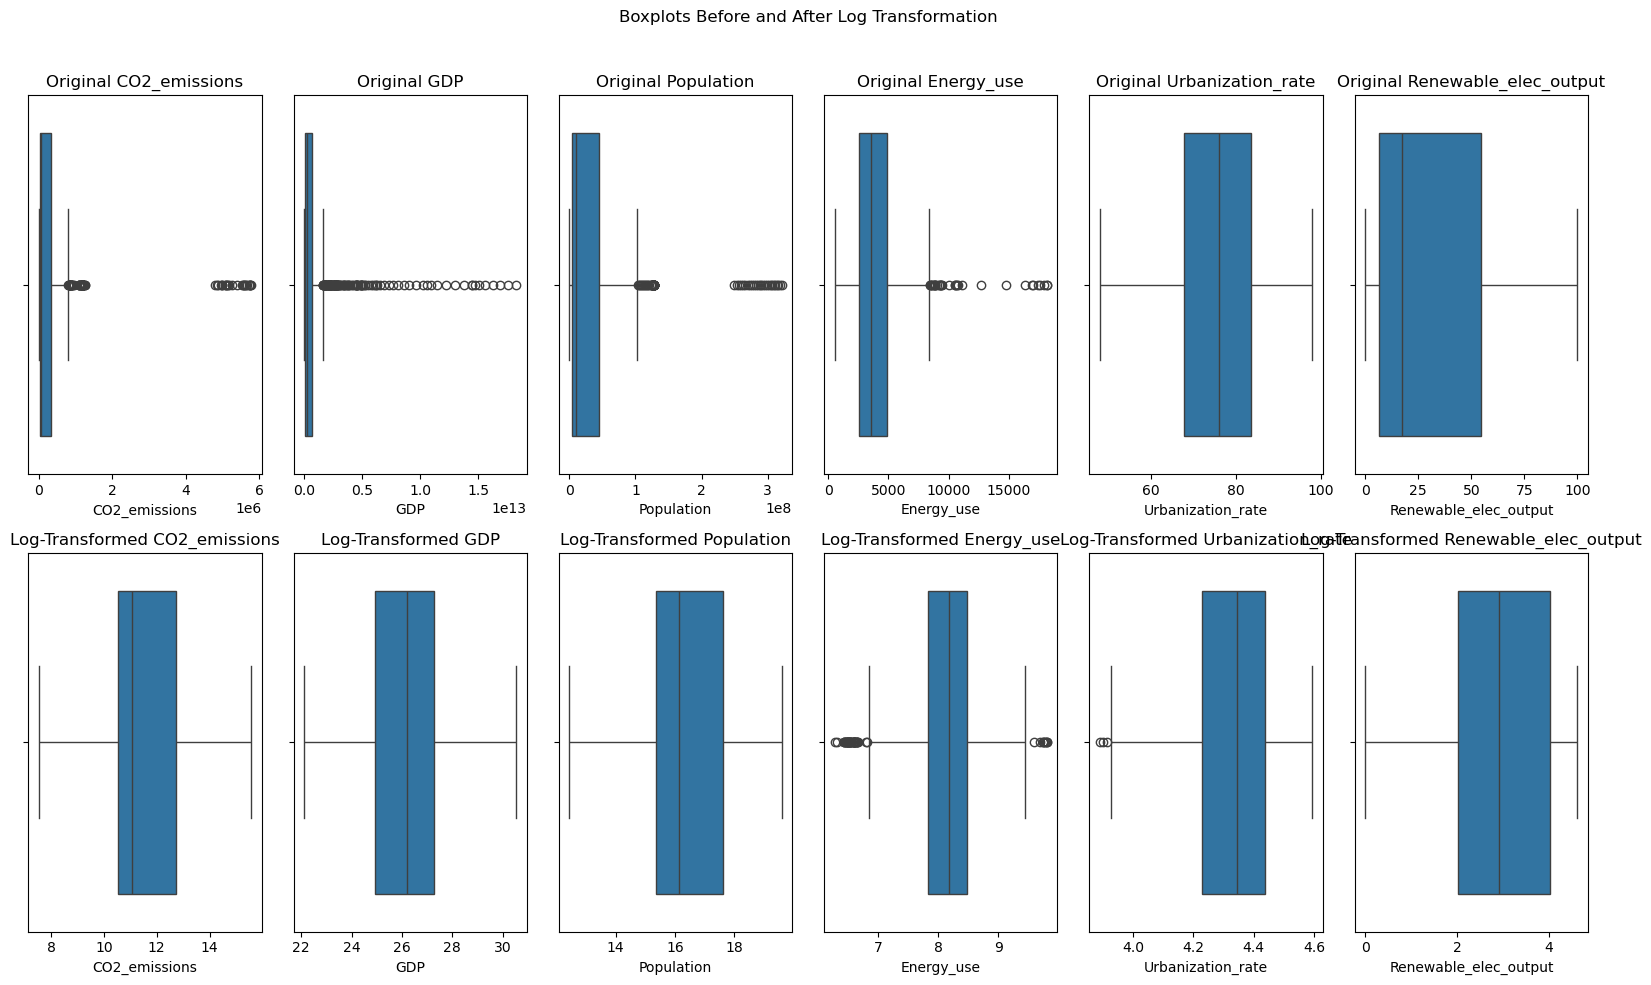

In [25]:
# Create a figure with subplots
fig, axes = plt.subplots(2, len(columns_to_transform), figsize=(16, 10))
fig.suptitle('Boxplots Before and After Log Transformation')

for i, col in enumerate(columns_to_transform):
    # Original data
    sns.boxplot(x=df_no_null[col], ax=axes[0, i])
    axes[0, i].set_title(f'Original {col}')
    
    # Log-transformed data
    sns.boxplot(x=np.log(df_no_null[col] + 1), ax=axes[1, i])
    axes[1, i].set_title(f'Log-Transformed {col}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [26]:
# Log transformation
cols_to_transform=['CO2_emissions', 'GDP', 'Population', 'Energy_use']
df_log = manipulate_data.log_transformation(df_no_null, cols_to_transform)
df_log.drop(columns=cols_to_transform, inplace=True)
df_log.head()

,country,date,Urbanization_rate,Renewable_elec_output,log_CO2_emissions,log_GDP,log_Population,log_Energy_use
0,Australia,2015,85.701,13.637841,12.863031,27.932435,16.985868,8.609739
1,Australia,2014,85.602,14.906712,12.845999,28.015329,16.971476,8.582172
2,Australia,2013,85.502,13.264108,12.869864,28.086737,16.956560,8.606923
3,Australia,2012,85.402,10.592653,12.888389,28.067759,16.939349,8.626278
4,Australia,2011,85.300,10.426652,12.885216,27.966565,16.921890,8.656300


In [27]:
df_log.describe()

,Urbanization_rate,Renewable_elec_output,log_CO2_emissions,log_GDP,log_Population,log_Energy_use
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000
mean,74.925034,30.448862,11.375121,26.119888,16.303954,8.118305
std,11.090293,30.216464,1.602010,1.756508,1.509389,0.597639
min,47.915000,0.000000,7.528816,22.112828,12.448340,6.276882
25%,67.708500,6.459901,10.512699,24.931567,15.362315,7.828730
50%,75.939500,17.478075,11.065032,26.196538,16.147324,8.179132
75%,83.465000,54.587631,12.730731,27.257544,17.604788,8.486140
max,97.876000,99.988380,15.569189,30.537650,19.586138,9.808030


In [28]:
df_log.to_csv('clean_data/wbdata_cleaned.csv', index=False)

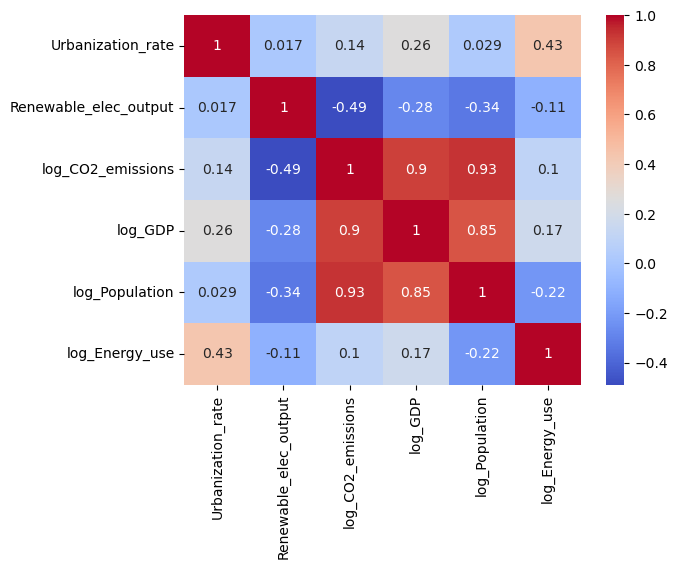

In [33]:
df_log_only_numeric = df_log.select_dtypes(include=[np.number])
sns.heatmap(df_log_only_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

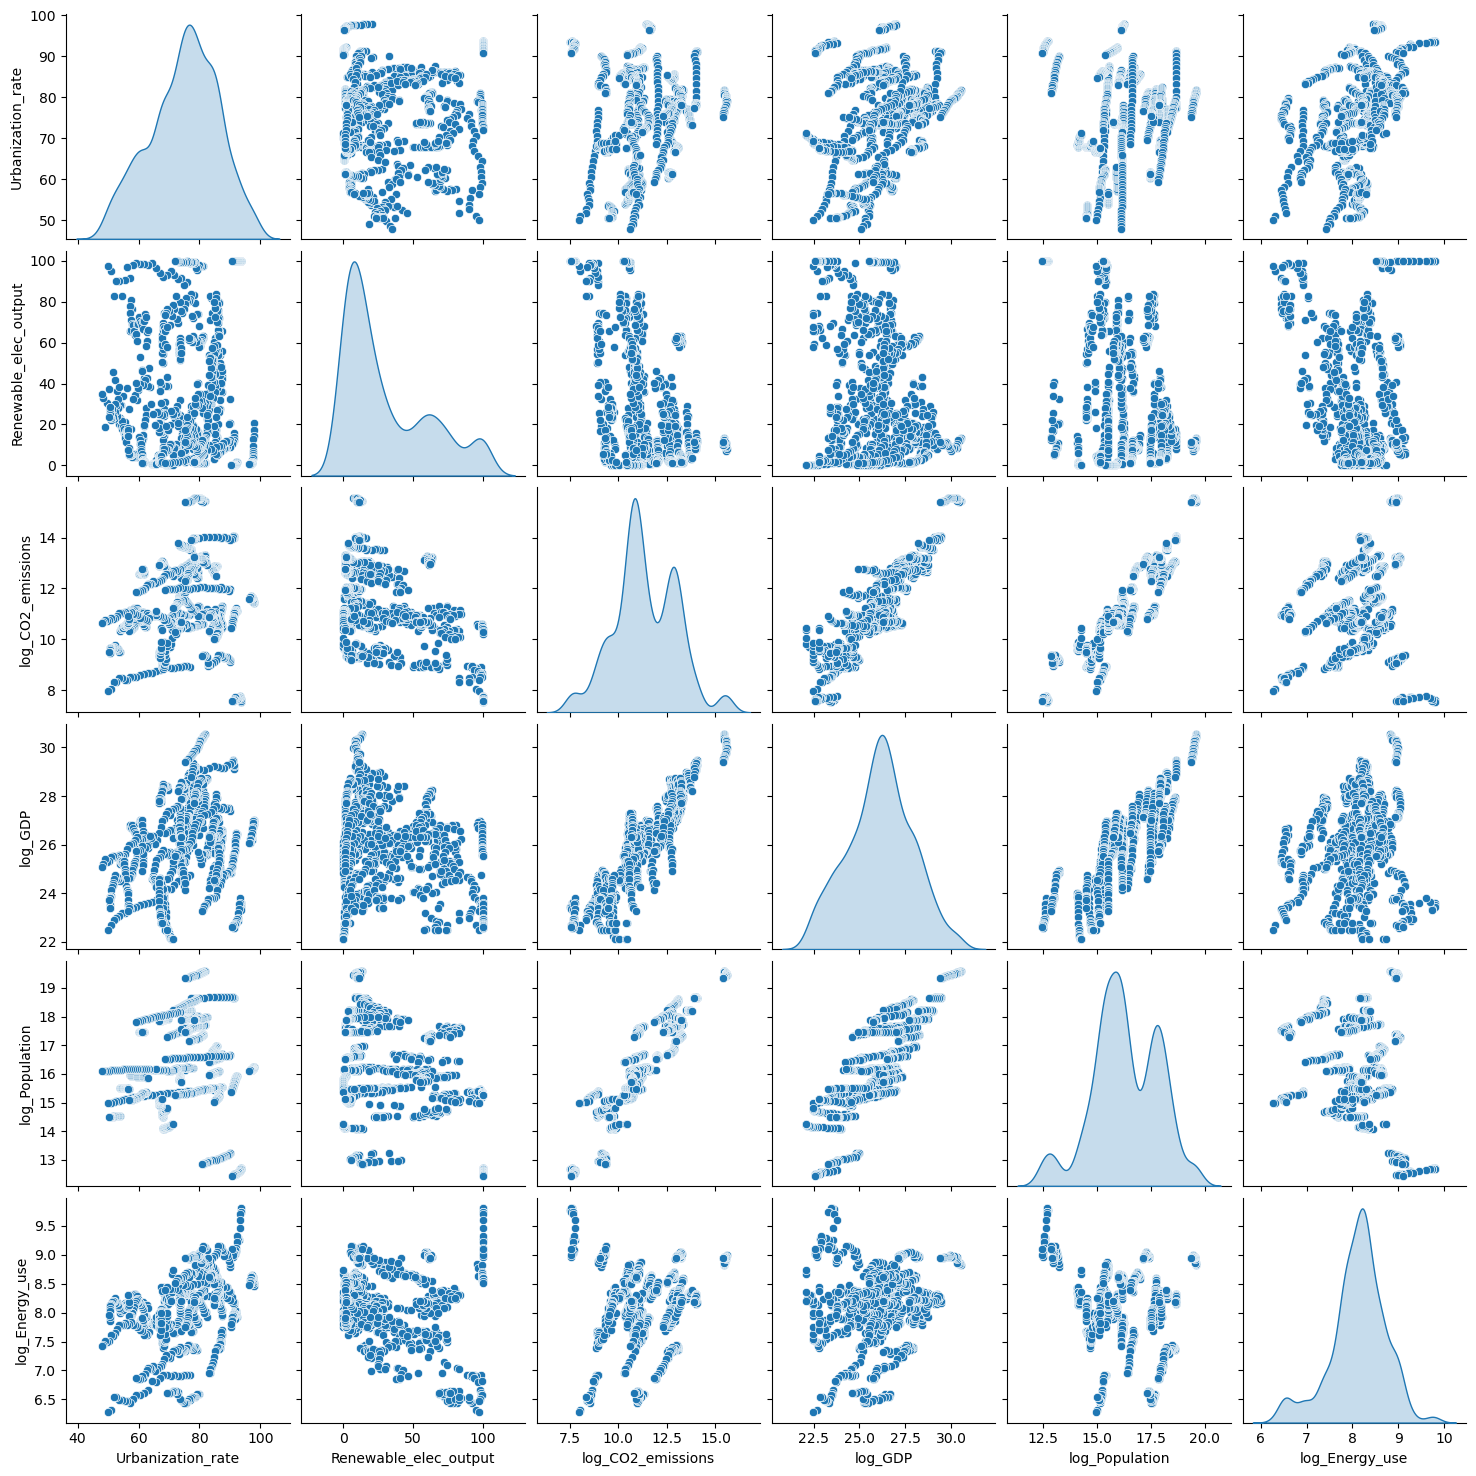

In [30]:
sns.pairplot(df_log_only_numeric, diag_kind='kde')
plt.show()

In [31]:
grouped_df = df_log.drop(columns='country').groupby('date').mean()
grouped_df.head()

,Urbanization_rate,Renewable_elec_output,log_CO2_emissions,log_GDP,log_Population,log_Energy_use
date,,,,,,
1990,72.391079,28.793548,11.319756,25.423439,16.224589,8.072613
1991,72.592237,28.782744,11.329537,25.461919,16.234378,8.071868
1992,72.775605,28.769815,11.314092,25.536287,16.241700,8.048051
1993,72.968474,30.166952,11.305893,25.528376,16.247962,8.045914
1994,73.173395,29.965344,11.323445,25.601828,16.253993,8.049759


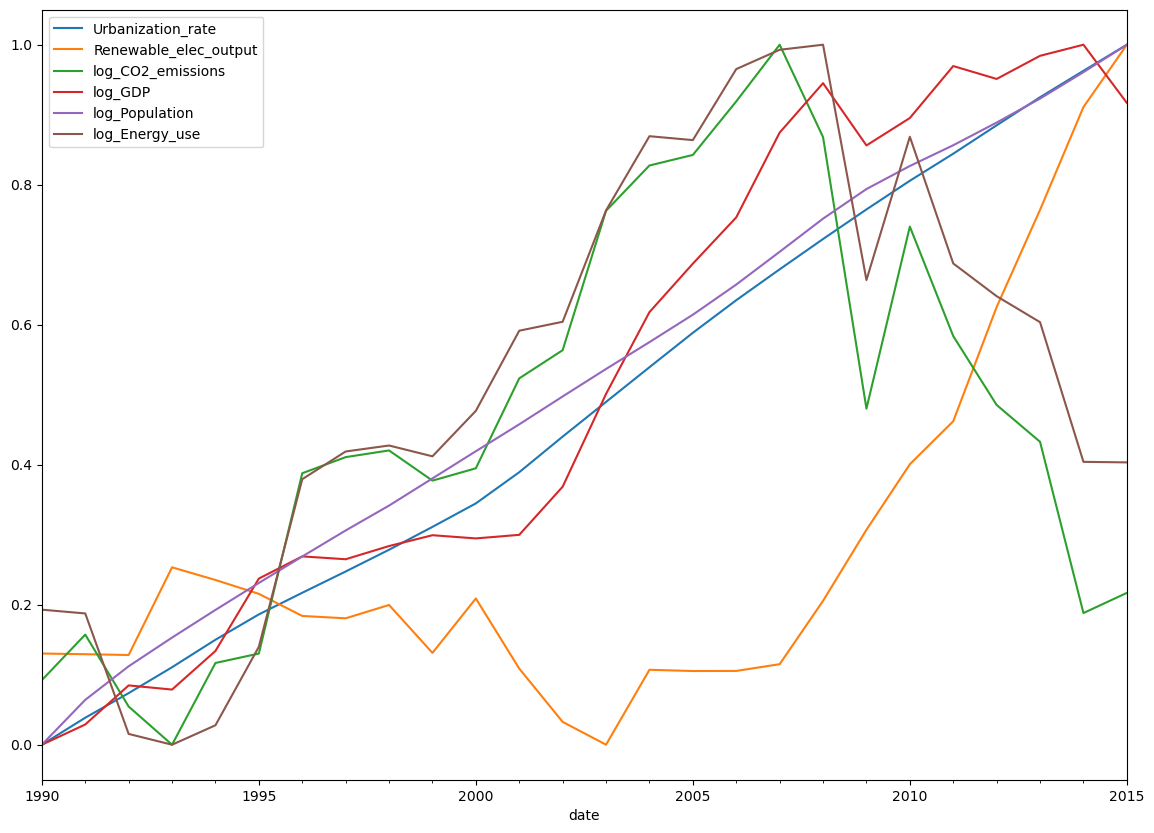

In [32]:
min_max_scaler = MinMaxScaler()
oecd_norm_df = pd.DataFrame(min_max_scaler.fit_transform(grouped_df), columns=grouped_df.columns, index=grouped_df.index)

oecd_norm_df.index = pd.to_datetime(grouped_df.index, format='%Y')
oecd_norm_df.plot(figsize=(14, 10))
plt.legend(loc='best')
plt.show()